In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pycountry


In [4]:
plt.style.use('default')

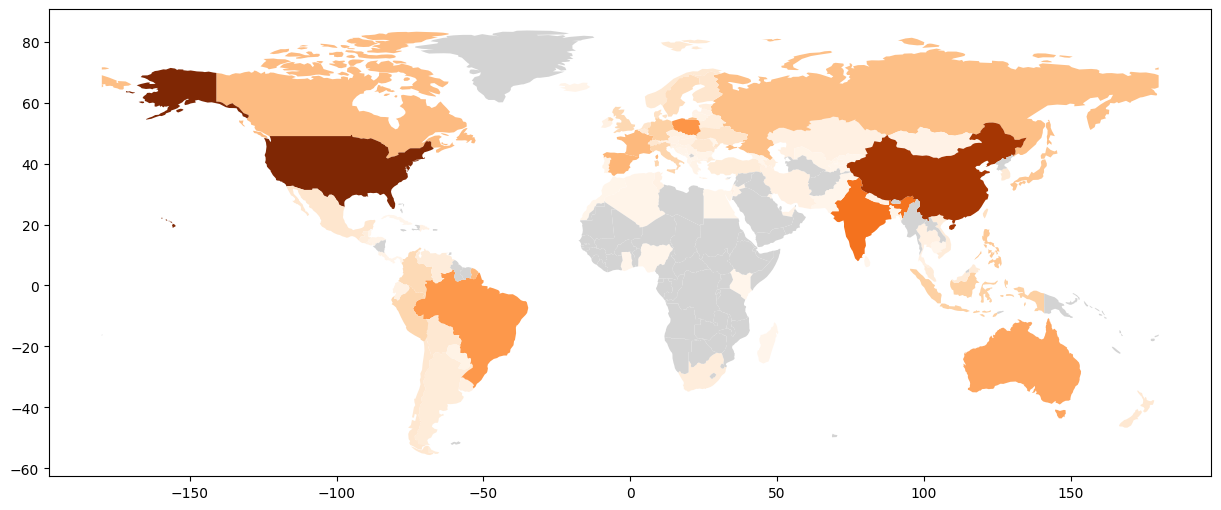

In [12]:
# Heatmap of countries where cubing competitions have been held

countryComps = pd.read_csv("../datasets/countryComps.csv", delimiter=',')
countryComps = countryComps.sort_values(['count'], ascending=False).reset_index().drop(columns=['index'])
countryComps['iso3'] = np.NAN

for i in range(len(countryComps)):
    countryComps.at[i, 'iso3'] = pycountry.countries.get(alpha_2=countryComps.iloc[i]['iso2']).alpha_3

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica")].reset_index().drop(columns=['index'])

world['count'] = np.NAN
for i in range(len(world)):
    code = world.iloc[i].iso_a3
    row = countryComps[countryComps['iso3'] == code]
    if code == "USA":
        world.at[i, 'count'] = 700
        continue
    if len(row) == 0:
        world.at[i, 'count'] = np.nan
    else:
        world.at[i, 'count'] = row['count']

plt.rcParams['figure.figsize'] = (15, 10)
fig = world.plot(column='count',
           cmap='Oranges',
           missing_kwds={
        "color": "lightgrey",
        # "edgecolor": "red",
        # "hatch": "///",
        "label": "Missing values",
    },)

# fig = fig.get_figure()
# fig.savefig('test.png', dpi=1200)

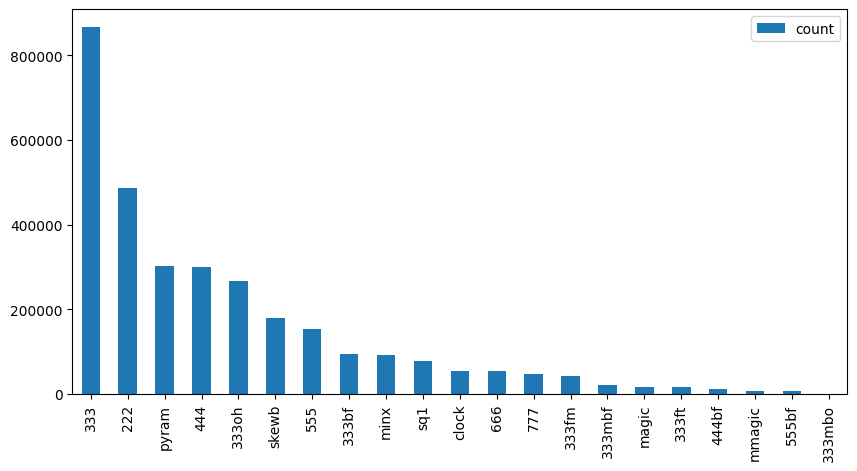

In [6]:
# Number of registered rounds by different events
eventCountDf = pd.read_csv("../datasets/eventCount.csv", delimiter=',')
plt.rcParams['figure.figsize'] = (10, 5)
ax = eventCountDf.plot(kind='bar')
ax.set_xticks(ticks=eventCountDf.index, labels=eventCountDf.event)



C:\Users\karlo\AppData\Local\Temp\ipykernel_84624\3925297749.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  compParticipationsFreq[:10].plot(kind='bar', xlabel="Number of competitions participated", ylabel="Percentage of all competitors")


<AxesSubplot: xlabel='Number of competitions participated', ylabel='Percentage of all competitors'>

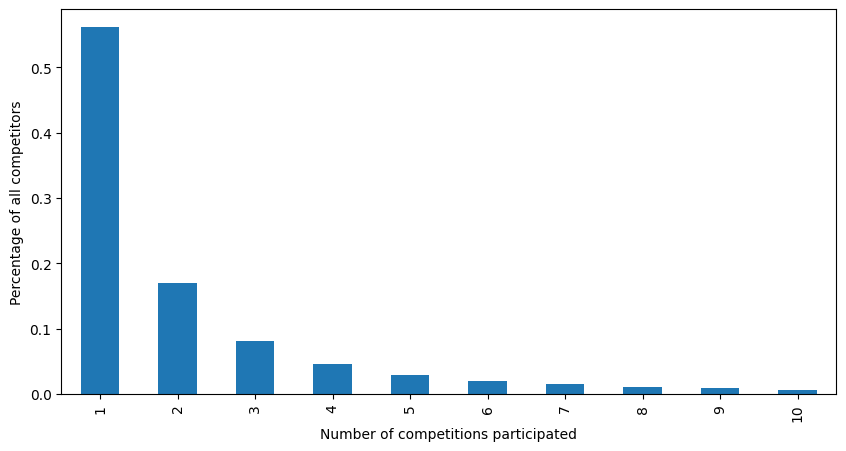

In [24]:
# Percentage of competitors that have participated at X competitions

plt.rcParams['figure.figsize'] = (10, 5)
compParticipations = pd.read_csv("../datasets/compsParticipated.csv")
compParticipationsFreq = compParticipations.value_counts().sort_index()
compParticipationsFreq = compParticipationsFreq / sum(compParticipationsFreq)
compParticipationsFreq.index = list(x[0] for x in compParticipationsFreq.index)


compParticipationsFreq[:10].plot(kind='bar', xlabel="Number of competitions participated", ylabel="Percentage of all competitors")

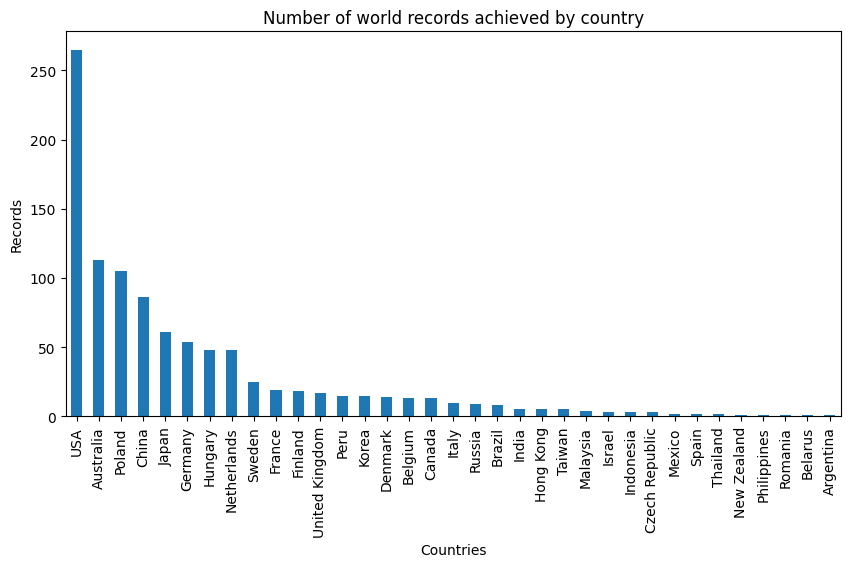

In [44]:
# Number of records achieved by country

countryWRs = pd.read_csv('../datasets/countriesByWRs.csv')
countryWRs.plot(kind='bar',x='country', y='records', legend=False, xlabel='Countries', ylabel='Records', title='Number of world records achieved by country')
countryWRs['records'] = countryWRs['records'] / countryWRs['individuals']

<AxesSubplot: title={'center': 'Number of average world records per country representative'}, xlabel='Countries', ylabel='Records per person'>

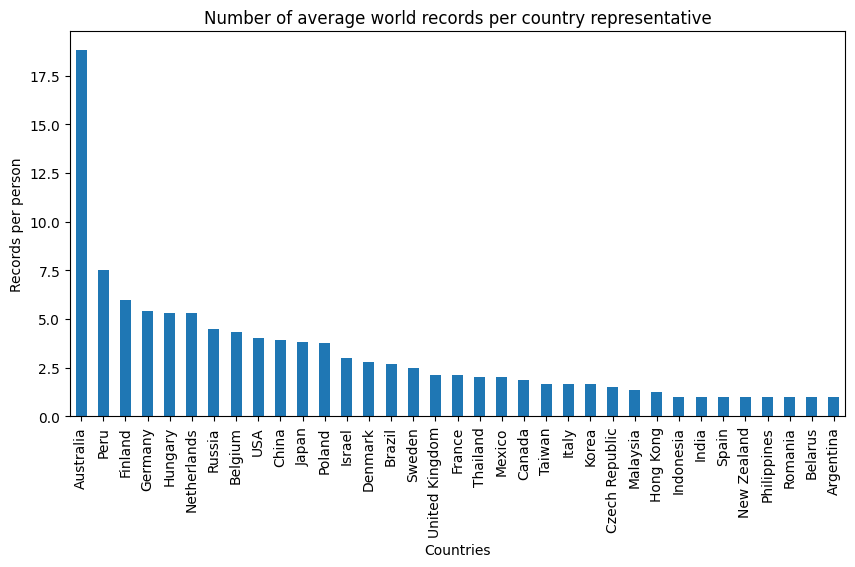

In [52]:
countryWRs = countryWRs.sort_values(by=['records'], ascending=False)
countryWRs.plot(kind='bar',x='country', y='records', legend=False, xlabel='Countries', ylabel='Records per person', title='Number of average world records per country representative')
